In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [116]:
# read data in tensorflow 
data = pd.read_csv("../../data/external/Uber_lyft/cab_rides.csv")
# convert timestamp to datetime
data['datetime'] = pd.to_datetime(data['time_stamp'], unit='ms')
# round to nearest second
data['datetime'] = data['datetime'].dt.round('s')
data = data[data.datetime < "2018-12-05"]
data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:24
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:03
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,2018-11-26 05:03:00
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:06
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:06
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:06
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:06


In [117]:
# extract month, day, hour, minute
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data.sort_values(by=['datetime'], inplace=True)

data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,month,day,hour,minute
449958,2.50,Uber,1543203646422,Beacon Hill,South Station,NaN,1.0,68c01519-3da8-4f84-b113-48cf6d1441db,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-26 03:40:46,11,26,3,40
276566,2.19,Uber,1543203646358,North End,Beacon Hill,13.0,1.0,cec0651f-2280-48ac-86bf-cb0152cada9e,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-26 03:40:46,11,26,3,40
276565,2.19,Uber,1543203646358,North End,Beacon Hill,8.0,1.0,bb3f969d-3190-4bb8-9a84-dff2deba0a98,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-11-26 03:40:46,11,26,3,40
276564,2.19,Uber,1543203646358,North End,Beacon Hill,17.5,1.0,90e22612-d1c7-47c2-af54-2a2240109889,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-26 03:40:46,11,26,3,40
261361,2.30,Lyft,1543203646421,Boston University,Beacon Hill,9.0,1.0,d3d168df-a1b6-4de3-b1a1-7d1fb464bd41,lyft,Lyft,2018-11-26 03:40:46,11,26,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636585,3.52,Lyft,1543906085870,North Station,Boston University,16.5,1.0,bc33c4ab-e279-46b0-97d4-4ecf3cc095a1,lyft_plus,Lyft XL,2018-12-04 06:48:06,12,4,6,48
636586,3.52,Lyft,1543906085870,North Station,Boston University,19.5,1.0,ef937e20-c491-405e-bbec-1230c5ee8b08,lyft_premier,Lux,2018-12-04 06:48:06,12,4,6,48
534559,3.39,Uber,1543906086059,North Station,Boston University,16.0,1.0,ca624523-777a-46ea-b991-f8bd2add01e2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-04 06:48:06,12,4,6,48
534560,1.18,Uber,1543906086059,Theatre District,Haymarket Square,9.5,1.0,5ee67992-95d5-4222-b482-665939ce8dc4,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-04 06:48:06,12,4,6,48


In [118]:
average_data = data.groupby([pd.Grouper(key='datetime', freq='1h')])[['surge_multiplier']].mean().reset_index().dropna()['surge_multiplier']
average_data

0      1.029762
1      1.013095
2      1.015997
3      1.016917
4      1.008185
         ...   
191    1.015224
192    1.010417
193    1.017191
194    1.010951
195    1.014744
Name: surge_multiplier, Length: 191, dtype: float64

In [119]:
def normalize(x):
  mean, variance = tf.nn.moments(x, axes=[0])
  return (x - mean) / tf.sqrt(variance)

def denormalize_data(data, mean, std):
    # denormalize data using tensorflow
    data = data.map(lambda x: (x * std) + mean)
    

def split_train_val_test(data, train_size, val_size, test_size):
    # split the dataset into train, validation, and test
    train = data.take(int(len(data)*train_size))
    val = data.skip(int(len(data)*train_size)).take(int(len(data)*val_size))
    test = data.skip(int(len(data)*train_size)).skip(int(len(data)*val_size)).take(int(len(data)*test_size))
    return train, val, test


def window_data(data, window_size, batch_size, shuffle_buffer):
    # apply window function to create a windowed dataset
    windowed_data = data.window(window_size, shift=1, drop_remainder=True)
    # apply flat_map to flatten the dataset
    windowed_data = windowed_data.flat_map(lambda window: window.batch(window_size))
    # apply map to create a tuple of (input, output)
    windowed_data = windowed_data.map(lambda window: (window[:-1], window[-1:]))
    # apply shuffle to shuffle the dataset
    windowed_data = windowed_data.shuffle(shuffle_buffer)
    # apply batch to create batches of 32
    windowed_data = windowed_data.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return windowed_data

window_size = 20
batch_size = 10
shuffle_buffer_size = 10

single_type_tf = tf.data.Dataset.from_tensor_slices(average_data.to_numpy())
# single_type_tf
# single_type_tf = single_type_tf.map(normalize)
train, val, test = split_train_val_test(single_type_tf, 0.7, 0.15, 0.15)
train = window_data(train, window_size, batch_size, shuffle_buffer_size)
val = window_data(val, window_size, batch_size, shuffle_buffer_size)
test = window_data(test, window_size, batch_size, shuffle_buffer_size)


In [120]:
# show first batch
for x, y in train.take(1):
    print(x.numpy())
    print(y.numpy())

[[1.01532738 1.01354167 1.00922619 1.01860119 1.00907738 1.00907738
  1.01577381 1.00952381 1.01309524 1.01309524 1.01383929 1.01354167
  1.00835253 1.01209936 1.01029339 1.01318473 1.0161859  1.01482372
  1.01105769]
 [1.00818452 1.01388889 1.01570916 1.01532738 1.01354167 1.00922619
  1.01860119 1.00907738 1.00907738 1.01577381 1.00952381 1.01309524
  1.01309524 1.01383929 1.01354167 1.00835253 1.01209936 1.01029339
  1.01318473]
 [1.00922619 1.01860119 1.00907738 1.00907738 1.01577381 1.00952381
  1.01309524 1.01309524 1.01383929 1.01354167 1.00835253 1.01209936
  1.01029339 1.01318473 1.0161859  1.01482372 1.01105769 1.01225962
  1.01137821]
 [1.01599702 1.01691729 1.00818452 1.01388889 1.01570916 1.01532738
  1.01354167 1.00922619 1.01860119 1.00907738 1.00907738 1.01577381
  1.00952381 1.01309524 1.01309524 1.01383929 1.01354167 1.00835253
  1.01209936]
 [1.01860119 1.00907738 1.00907738 1.01577381 1.00952381 1.01309524
  1.01309524 1.01383929 1.01354167 1.00835253 1.01209936 1.0

In [121]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=10, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint("my_checkpoint.h5", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)
model.fit(train, epochs=500,
          validation_data=val,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
12/12 [==============================] - 5s 99ms/step - loss: 0.3646 - mae: 0.8312 - val_loss: 0.1697 - val_mae: 0.4951
Epoch 2/500
12/12 [==============================] - 0s 13ms/step - loss: 0.1415 - mae: 0.4428 - val_loss: 0.1212 - val_mae: 0.4123
Epoch 3/500
12/12 [==============================] - 0s 13ms/step - loss: 0.1037 - mae: 0.3424 - val_loss: 0.0920 - val_mae: 0.2880
Epoch 4/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0829 - mae: 0.2681 - val_loss: 0.0717 - val_mae: 0.2542
Epoch 5/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0650 - mae: 0.2363 - val_loss: 0.0563 - val_mae: 0.1920
Epoch 6/500
12/12 [==============================] - 0s 14ms/step - loss: 0.0512 - mae: 0.1791 - val_loss: 0.0452 - val_mae: 0.1715
Epoch 7/500
12/12 [==============================] - 0s 13ms/step - loss: 0.0419 - mae: 0.1683 - val_loss: 0.0378 - val_mae: 0.1600
Epoch 8/500
12/12 [==============================] - 0s 14ms/step - loss: 0.

In [122]:
model = tf.keras.models.load_model("my_checkpoint.h5")

def model_forecast(model, ds, window_size):
    # ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

rnn_forecast = model_forecast(model, single_type_tf, window_size)
rnn_forecast = rnn_forecast[46 - window_size:-1, -1, 0]

18/18 [==============================] - 1s 3ms/step


<AxesSubplot: ylabel='surge_multiplier'>

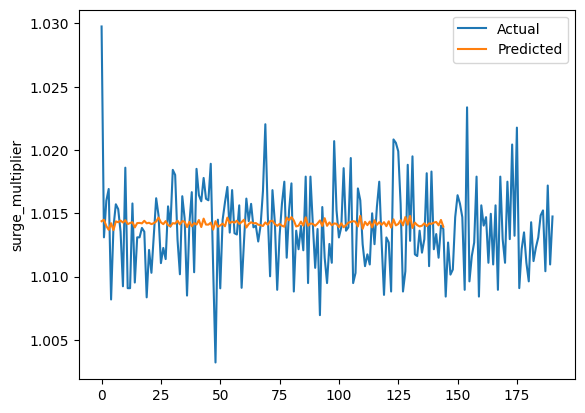

In [123]:
sns.lineplot(x=range(len(average_data)), y=average_data, label='Actual')
sns.lineplot(x=range(len(rnn_forecast)), y=rnn_forecast.flatten(), label='Predicted')